              ts_code     open     high      low    close  pre_close  change  \
trade_date                                                                     
2020-01-02  600519.SH  1128.00  1145.06  1116.00  1130.00    1183.00  -53.00   
2020-01-03  600519.SH  1117.00  1117.00  1076.90  1078.56    1130.00  -51.44   
2020-01-06  600519.SH  1070.86  1092.90  1067.30  1077.99    1078.56   -0.57   
2020-01-07  600519.SH  1077.50  1099.00  1076.40  1094.53    1077.99   16.54   
2020-01-08  600519.SH  1085.05  1095.50  1082.58  1088.14    1094.53   -6.39   

            pct_chg        vol        amount  
trade_date                                    
2020-01-02  -4.4801  148099.16  1.669684e+07  
2020-01-03  -4.5522  130318.78  1.426638e+07  
2020-01-06  -0.0528   63414.78  6.853918e+06  
2020-01-07   1.5343   47853.59  5.220697e+06  
2020-01-08  -0.5838   25008.25  2.720372e+06  


D:\Anaconda\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 50)              │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,851 (124.42 KB)

 Trainable params: 31,851 (124.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5012 - loss: 0.6865 - val_accuracy: 0.6324 - val_loss: 0.6601
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6223 - loss: 0.6263 - val_accuracy: 0.6324 - val_loss: 0.6602
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6841 - loss: 0.5737 - val_accuracy: 0.6108 - val_loss: 0.6635
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7406 - loss: 0.5526 - val_accuracy: 0.5892 - val_loss: 0.6765
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7230 - loss: 0.5508 - val_accuracy: 0.4811 - val_loss: 0.7030
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7263 - loss: 0.5454 - val_accuracy: 0.6162 - val_loss: 0.6871
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7227 - loss: 0.5391 - val_accuracy: 0.6324 - val_loss: 0.6556
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7389 - loss: 0.5462 - val_accuracy: 0.6270 - v

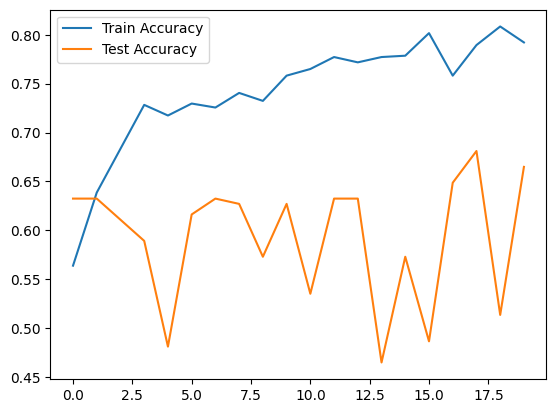

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
              precision    recall  f1-score   support

           0       0.66      0.97      0.78       117
           1       0.71      0.15      0.24        68

    accuracy                           0.66       185
   macro avg       0.69      0.56      0.51       185
weighted avg       0.68      0.66      0.59       185

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
未来1个月上涨概率: 0.40509546


In [7]:
import pandas as pd

# 读取数据
df = pd.read_csv("600519.csv", parse_dates=["trade_date"], index_col="trade_date")
df.sort_index(inplace=True)  # 按日期排序
print(df.head())
# 移动平均线
df["MA5"] = df["close"].rolling(5).mean()
df["MA20"] = df["close"].rolling(20).mean()

# RSI（相对强弱指数）
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df["RSI"] = calculate_rsi(df["close"])

# MACD（指数平滑移动平均线）
df["EMA12"] = df["close"].ewm(span=12, adjust=False).mean()
df["EMA26"] = df["close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA12"] - df["EMA26"]
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

# 布林带
df["STD20"] = df["close"].rolling(20).std()
df["Upper_Band"] = df["MA20"] + 2 * df["STD20"]
df["Lower_Band"] = df["MA20"] - 2 * df["STD20"]

# 删除NaN值
df.dropna(inplace=True)
N = 20  # 预测未来20天（约1个月）
df["target"] = (df["close"].shift(-N) > df["close"]).astype(int)  # 1=涨，0=跌
df.dropna(inplace=True)  # 删除最后N天的NaN
from sklearn.preprocessing import MinMaxScaler

features = ["close", "MA5", "MA20", "RSI", "MACD", "Signal", "vol"]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])
import numpy as np

def create_dataset(data, target, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(target[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # 用过去30天的数据预测未来
X, y = create_dataset(scaled_data, df["target"].values, time_steps)
split = int(0.8 * len(X))  # 80%训练，20%测试
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, len(features))),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.legend()
plt.show()
y_pred = (model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
last_30_days = scaled_data[-time_steps:]  # 取最近30天数据
future_pred = model.predict(last_30_days.reshape(1, time_steps, len(features)))
print("未来1个月上涨概率:", future_pred[0][0])